# Исследование компьютерных игр

По собранным в интернете данным компания по продаже компьютерных игр хочет выявить определяющие успех игры факторы для
 последующих закупок и рекламных акций.


## Оглавление:
* [Шаг 1. Файл с данными изучение общей информации](#first)
* [Шаг 2. Предобработка данных](#second)
* [Шаг 3. Исследовательский анализ данных](#third)
* [Шаг 4. Портрет пользователя каждого региона](#fourth)
* [Шаг 5. Проверка гипотез](#fifth)
* [Шаг 6. Общий вывод](#sixth)

# Шаг 1. Файл с данными изучение общей информации. <a class="anchor" id="first"></a>

## Импорт библиотек

In [1]:
# <импорт библиотеки pandas для таблиц>
import pandas as pd
#<импорт библиотеки matplotlib для графиков>
import matplotlib.pyplot as plt
#<импорт библиотеки для проверки гипотез>
from scipy import stats as st

## Получение информации

Прочитаем файл *games.csv* и сохраним его в переменной *df*. 

In [2]:
# <чтение файла с данными с сохранением в df>
from io import BytesIO
import requests

spreadsheet_id = '1kl3ifbGQXW1Q0GgN5-3HSYLopaGoZov9CDPQFfrRkks'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))

Получение первых 10 строк таблицы.

In [3]:
# <получение первых 10 строк таблицы df>
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Общая информация о данных таблицы *df*.

In [4]:
# <получение общей информации о данных в таблице df>
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим полученную информацию подробнее.

Всего в таблице 11 столбцов, типы данных столбцов - object, float64.

Подробно разберём, какие в *df* столбцы и какую информацию они содержат:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Количество значений в столбцах различается. Это говорит о том, что в данных есть нулевые значения.
Заметим, что названия столбцов некорректны и их нужно привести к нижнему регистру.

### Вывод

Каждая строка таблицы содержит информацию об определённой игре, которая продавалась ранее. Проблемы, которые нужно решать:

* пропуски
* некорректные значения
* аномалии
* замена типов данных
* обработка дубликатов
* категоризация данных

Для проверки рабочих гипотез особенно ценны столбцы *rating* и *platform*.

# Шаг 2. Предобработка данных <a class="anchor" id="second"></a>

## Приведение к нижнему регистру названия столбцов

Переименуем столбцы для удобства дальнейшей работы. Проверим результат.

In [5]:
# <Приведение к нижнему регистру столбцов методом lower>
df.columns = df.columns.str.lower()
# <проверка результатов - перечень названий столбцов>
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Приведение типов и обработка пропусков

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [6]:
# <суммарное количество пропусков, выявленных методом isnull() в таблице df>
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Размер всех строк с пропущенными значениями может быть больше 50%, а значит просто избавиться от данных мы не можем. Но в столбце с именем и жанром пропуски состовляют всего 2 строчки (менее 1%), их угадать мы никак не сможем. Удалим их.

In [7]:
#<удаление всех строк с пустыми name и genre со сбросом индексов>
df = df.dropna(subset = ['name', 'genre']).reset_index(drop = True)

Каждая игра выходила на определенной платформе. А каждой платформе характерен тот или иной период времени. Поэтому создадим таблицу, где будут храниться названия платформы и медианный год, издаваемых на ней игр.

In [8]:
#<Создание таблицы со медианным годом>
platform_year = df.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'median')
platform_year

,year_of_release
platform,
2600,1982.0
3DO,1995.0
3DS,2013.0
DC,2000.0
DS,2008.0
GB,1997.0
GBA,2003.0
GC,2003.0
GEN,1993.0


Заменим прропущенные года издания на средние из таблицы.

In [9]:
#<Функция для получения среднего года издания для платформы>
def get_year (row):
    platform = row['platform']
    return platform_year.loc[platform, 'year_of_release']

#<Применение функции>
df.loc[df['year_of_release'].isna(), 'year_of_release'] = df.loc[df['year_of_release'].isna()].apply(get_year, axis = 1)

Год издания не может быть дробным, приведем его к типу **int**.

In [10]:
#<приведение типов методом astype>
df['year_of_release'] = df['year_of_release'].astype('int')

У столбца *critic_score* тип **float**, а у *user_score* **object**. Значит в столбце *user_score* есть данные типа **str**. Посмотрим уникальные значения столбца.

In [11]:
#<получение уникальных значений методом unique>
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Мы можем видеть значение `tbd` - to be determined. То есть оценка еще не выставлена.

Посмотри уникальные значения в столбце *rating*

In [12]:
#<получение уникальных значений методом unique>
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Здесь нет `tbd`. Заменим это значение и все пропуски на -1 в столбце *user_score* и приведем его к типу float.

In [13]:
#<замена значений методом replace>
df['user_score'] = df['user_score'].replace('tbd', -1)
#<замена пропущенных значений>
df['user_score'] = df['user_score'].fillna(-1)
#<приведение типов методом astype>
df['user_score'] = df['user_score'].astype('float')

Создадим таблицу, в которую поместим данные о медианной оценке критиков, пользователей и рейтинге для каждого жанра.

In [14]:
#<Создание таблицы с медианной оценкой критиков>
genre_rating = df.pivot_table(index = 'genre', values = 'critic_score', aggfunc = 'median')
#<добавляем столбец с пользовательской оценков (не учитываем поставленное нами значение -1)>
genre_rating['user_score'] = df.query('user_score != -1').pivot_table(index = 'genre', values = 'user_score', aggfunc = 'median')
#<округляем данные в таблице>
genre_rating = round(genre_rating, 2)

При вызове метода **value_counts()** получается объект Series, где пары ключ-количество отсортированы в порядке убывания количества. Т.е. первым всегда идет самое повторяющееся значение. Его и возьмем за среднее.

In [15]:
#<для каждой строки таблицы>
for i in genre_rating.index:
    #<выбираем количество для каждого жанра>
    for j in df.query('genre == @i')['rating'].value_counts().index:
        #<присваиваем первый индекс>
        genre_rating.loc[i, 'rating'] = j
        #<выходим>
        break
        
genre_rating

,critic_score,user_score,rating
genre,,,
Action,68.0,7.4,T
Adventure,66.0,7.6,E
Fighting,72.0,7.6,T
Misc,69.0,7.1,E
Platform,69.0,7.7,E
Puzzle,70.0,7.5,E
Racing,69.0,7.4,E
Role-Playing,74.0,7.8,T
Shooter,73.0,7.4,M


Напишем функции, для замены пустых значений средними из таблицы.

In [16]:
#<Функция для получения медианной оценки критиков для жанра>
def get_critic_score (row):
    genre = row['genre']
    return genre_rating.loc[genre, 'critic_score']

#<Применение функции>
df.loc[df['critic_score'].isna(), 'critic_score'] = df.loc[df['critic_score'].isna()].apply(get_critic_score, axis = 1)

#<Функция для получения медианной оценки пользователей для жанра>
def get_user_score (row):
    genre = row['genre']
    return genre_rating.loc[genre, 'user_score']

#<Применение функции>
df.loc[df['user_score'] == -1, 'user_score'] = df.loc[df['user_score'] == -1].apply(get_user_score, axis = 1)

#<Функция для получения медианной рейтинга для жанра>
def get_rating (row):
    genre = row['genre']
    return genre_rating.loc[genre, 'rating']

#<Применение функции>
df.loc[df['rating'].isna(), 'rating'] = df.loc[df['rating'].isna()].apply(get_rating, axis = 1)

#<округление сзначений стобцов до 2 знаков после запятой>
df[['critic_score', 'user_score']] = round(df[['critic_score', 'user_score']], 2)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


## Суммарные продажи во всех регионах

Посчитаем суммарные продажи и добавим в столбец *all_sales*.

In [18]:
#<добавление новог столбца путем ссумирования существующих>
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,31.38


### Вывод

Заменены пропуски в столбцах:
* year_of_release	- медианное значение для платформы
* critic_score - среднее для жанра
* user_score - среднее для жанра
* rating - самое популярное для жанра

Удалены строки с пропусками в столбцах *name, genre*(потеря меньше 1%).

Приведены к типам следующие столбцы:
* year_of_release - int
* user_score - float

Добавлен новый столбец *all_sales* с суммами продаж во всех регионах.

# Шаг 3. Исследовательский анализ данных<a class="anchor" id="third"></a>

## Сколько игр выпускалось в разные годы

Посмотрим на данные по годам с помощью метода **describe** и построим гистограмму.

In [19]:
#<получение данных методом describe>
df['year_of_release'].describe()

count    16713.000000
mean      2006.474960
std          5.896089
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Text(0.5, 1.0, 'Количество выпущенных игр')

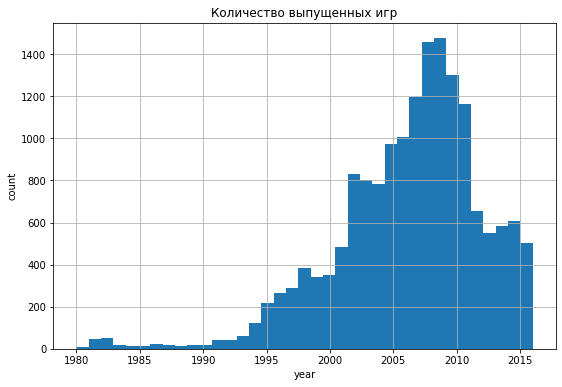

In [20]:
#<построение гистограммы методом hist>
df['year_of_release'].hist(bins = 37, figsize = (9, 6))
#<задаем оси графика>
plt.xlabel('year')
plt.ylabel('count')
plt.title('Количество выпущенных игр')

Можем наблюдать отрицательную скошенность(влево). Также видим два пика на 1980 и 2010, возможно это связано с тем, что в 1980 игры только появлялись и все хотели попробовать их написать/ в них поиграть, а может это ошибки. Решим, что с этим делать далее. Заметим, что с 2011 по 2016 количесвто выпускаемых игр практически одинаково (500-600).

## Как менялись продажи по платформам

Найдем топ-5 самых популярных платформ, по продажам игр. Для это создадим сводную таблицу с суммами для каждой платформы и не забудем отсортировать ее в порядке убывания.

In [21]:
#<pivot table с функцией суммы и сортировка>
sales_by_platform = df.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum').sort_values('all_sales', ascending = False).head()
sales_by_platform

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Посмотрим на данные этих платформ через **describe**.

In [22]:
#<для каждой полученной платформы>
for i in sales_by_platform.index:
    print(i)
    #<получение данных методом describe>
    print(df.query('platform == @i')['year_of_release'].describe())

PS2
count    2161.000000
mean     2004.590467
std         2.547926
min      2000.000000
25%      2002.000000
50%      2005.000000
75%      2007.000000
max      2011.000000
Name: year_of_release, dtype: float64
X360
count    1262.000000
mean     2009.883518
std         2.428988
min      2005.000000
25%      2008.000000
50%      2010.000000
75%      2011.000000
max      2016.000000
Name: year_of_release, dtype: float64
PS3
count    1331.000000
mean     2010.843727
std         2.436486
min      2006.000000
25%      2009.000000
50%      2011.000000
75%      2013.000000
max      2016.000000
Name: year_of_release, dtype: float64
Wii
count    1320.000000
mean     2008.967424
std         1.522039
min      2006.000000
25%      2008.000000
50%      2009.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64
DS
count    2151.000000
mean     2008.182706
std         1.766246
min      1985.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      

Мы нашли аномалию. Платформа DS  была выпущена в 2004 году, а игры уже выпустились в 1985. Возможно такие ошибки есть и еще, что и привело к увеличению количсетва игр за 1980-1990. Отсечем эти данные как выбросы.

In [23]:
#<отсечение данных>
df = df.query('year_of_release > 1990')

Построим гистограммы для каждой популярной платформы.

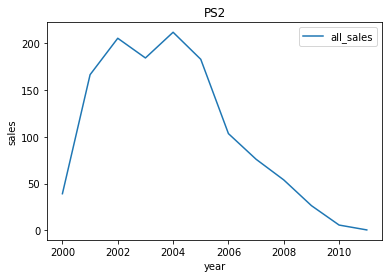

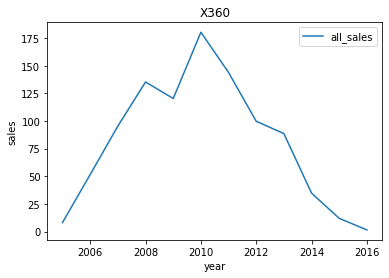

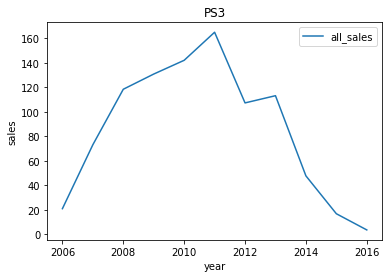

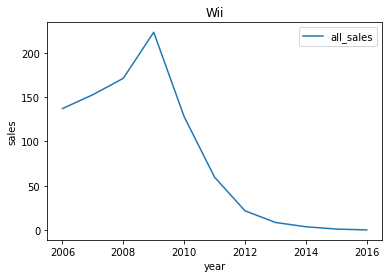

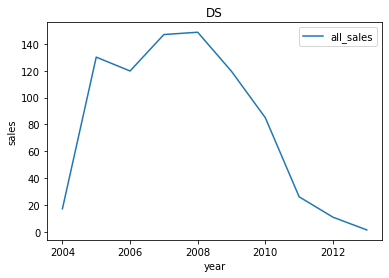

In [24]:
#<для каждой полученной платформы>
for i in sales_by_platform.index:
    #<построение обычного графика методом plot>
    df.query('platform == @i').pivot_table(index = 'year_of_release', values='all_sales',aggfunc = 'sum').plot()
    #<задаем оси графика>
    plt.xlabel('year')
    plt.ylabel('sales')
    plt.title(i)

От этапа создания консоли до этапа упадка в среднем проходит 10 лет. Исключение это самая популярная консоль в мире - PS2. Также в среднем на пике популярночти консоли находятся 5-6 лет.

## Выбор данных за соответствующий актуальный период

Возьмем данные за последние года размером равным половине "жизни" платформы (5 лет). За этот временной промежуток мы сможем точно понять на какой стадии находится консоль, как долгожительная, так и совсем разовая.

In [25]:
#<отсечение данных>
df = df.query('year_of_release > 2011')

## Какие платформы лидируют по продажам, растут или падают

Создадим таблицу, в которой будем хранить информацию о каждой платформе. Сначала добавим туда столбец с общими суммами продаж и отсортируем по нему.

In [26]:
#<pivot table с функцией суммы и сортировка>
platform_info = df.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum').sort_values('all_sales', ascending = False)
platform_info

,all_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,195.80
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.44
Wii,35.37


Определить растут или падают продажи для каждой платформы поможет коэффициент корреляции Пирсона. Разберем подробнее. Если зависимость между годами и продажами:

* стремится к 1 (прямая зависимость) - продажи на этой платформе растут
* стремится к +0 - продажи вышли на пик
* стремится к -0 - продажи уходят с пика
* стремится к -1 (обратная зависимлсть) - продажи падают

In [27]:
#<для каждой платформы>
for i in platform_info.index:
    #<создание сводной таблицы с годом и всеми продажами>
    table = df.query('platform == @i').pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'sum').reset_index()
    #<получение корреляции методом corr>
    platform_info.loc[i, 'corr_by_year'] = table['all_sales'].corr(table['year_of_release'])
platform_info

,all_sales,corr_by_year
platform,,
PS4,314.14,0.473145
PS3,288.79,-0.949441
X360,236.54,-0.968050
3DS,195.80,-0.926347
XOne,159.32,0.175658
WiiU,82.19,-0.698379
PC,62.65,-0.927995
PSV,49.44,-0.938624
Wii,35.37,-0.906749


Можем видеть, что продажи у PS4 растут, а платформа XOne находится почти на пике. Также они в топ-5 по выручке с игр. Их и будем считать потенциально прибыльными.

## «Ящик с усами» по глобальным продажам игр в разбивке по платформам.

Воспользуемся методом **boxplot**, чтобы построть диаграмму размаха.

PS4


<AxesSubplot:>

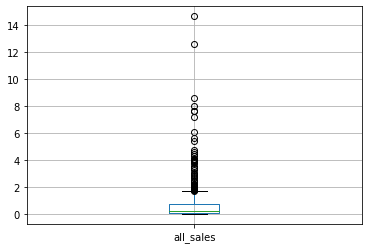

In [28]:
print('PS4')
#<Построение диаграммы размаха методом boxplot>
df.query('platform == "PS4"').boxplot(column = 'all_sales')

XOne


<AxesSubplot:>

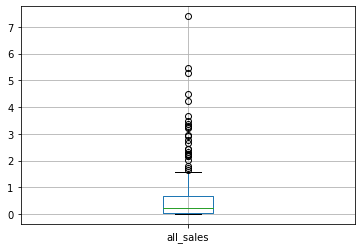

In [29]:
print('XOne')
#<Построение диаграммы размаха методом boxplot>
df.query('platform == "XOne"').boxplot(column = 'all_sales')

Можем наблюдать много выбросов в каждой диаграмме. Также в обоих случаях медиана находится ближе к первому квартелю. Также можно заметить по максимуму нормальных значений, что игры на XOne продаются немного меньшими копиями чем на PS4.

## Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами. Возьмем самую популярную PS4.

0.35140802447758496

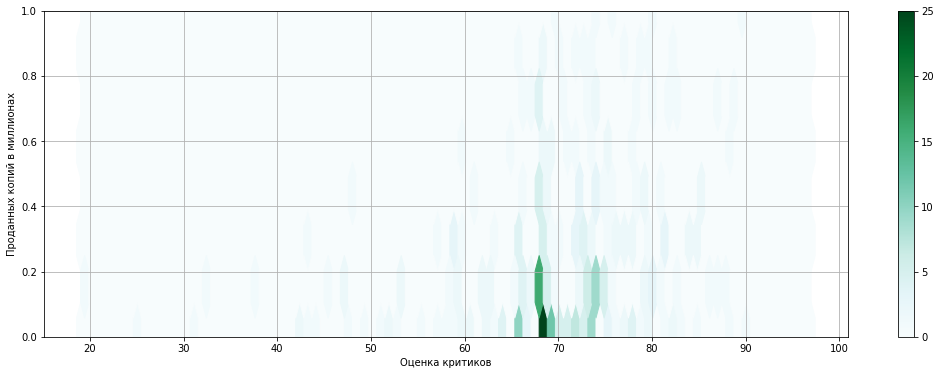

In [30]:
#<построение графика методом plot с параметром hexbin>
df.query('platform == "PS4"').plot(x = 'critic_score', y = 'all_sales',
                                  kind='hexbin', ylim = (0, 1), gridsize=90,
                                  sharex=False, grid=True, figsize = (18, 6))
#<задаем оси графика>
plt.xlabel("Оценка критиков")
plt.ylabel("Проданных копий в миллионах")

df.query('platform == "PS4"')['all_sales'].corr(df.query('platform == "PS4"')['critic_score'])

Зависимости почти нет. Теперь рассмотрим отзывы пользователей и продажи.

-0.06548195077585682

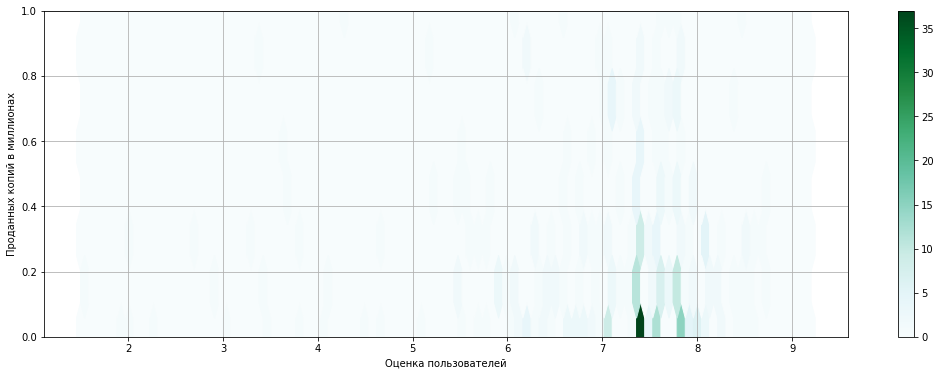

In [31]:
#<построение графика методом plot с параметром hexbin>
df.query('platform == "PS4"').plot(x = 'user_score', y = 'all_sales',
                                  kind='hexbin', ylim = (0, 1), gridsize=90,
                                  sharex=False, grid=True, figsize = (18, 6))
#<задаем оси графика>
plt.xlabel("Оценка пользователей")
plt.ylabel("Проданных копий в миллионах")

df.query('platform == "PS4"')['all_sales'].corr(df.query('platform == "PS4"')['user_score'])

Зависимости вообще нет. Но из двух этих графиков можно заметить, что пользователи чаще оценивают игры выше, чем критики. Теперь напишем цикл, который проверит корреляцию для других популярных платформ.

In [32]:
#<Ставим флаг, что все независимы>
flag = True
#<для каждой платформы>
for i in platform_info.index:
    #<если есть зависимость>
    if df.query('platform == @i')['all_sales'].corr(df.query('platform == @i')['user_score']) > 0.5:
        #<выводим какая платорма зависима>
        print(i, "зависима")
        #<меняем флаг, есть зависимые>
        flag = False
#<если флаг остался прежним>
if flag:
    print('Все независимы')

Все независимы


## Общее распределение игр по жанрам

Сгруппируем данные по жанрам и найдем количество игр, проданных копий и медианное количество проданных копий для каждого.

In [33]:
#<сводная таблица с числом, суммой и медианой>
genre_info = df.groupby('genre').agg({'all_sales':['count', 'sum', 'median']})
#<переименование столбцов>
genre_info.columns = ['count', 'sum',  'median']
#<сортировка по столбцу сумма>
genre_info = genre_info.sort_values('sum', ascending = False)
genre_info

,count,sum,median
genre,,,
Action,1032,441.52,0.120
Shooter,236,304.80,0.435
Role-Playing,372,193.09,0.140
Sports,269,181.09,0.240
Misc,192,85.04,0.120
Platform,85,61.00,0.210
Racing,116,53.59,0.135
Fighting,109,44.49,0.130
Simulation,82,35.61,0.120


Самым популярным оказался Action. Самое большое количесвто игр и число проданных копий. А вот Puzzle в самом конце по популярности. Также можно выделить жанр Shooter, где на каждую игру в среднем приходится по полмиллиона продаж. То есть игры этого жанра берут не количеством, а качеством.

### Вывод

Актуальными данными для анализа рынка на будущий год считаем данные за последние 5 лет. PS4 и XOne - потенциально прибыльные платформы. Большинство игр имеют количество продаж копий равное 0,4 - 0,5 млн. Оценки критиков и пользователей никак не влияют на количество проданных копий.

Самые популярные жанры Action, Shooter, причем в первом покупают много разных игр, а во втором - много копий одной игры. Самый непопулярный жанр - Puzzle.

# Шаг 4. Портрет пользователя каждого региона<a class="anchor" id="fourth"></a>

## Самые популярные платформы (топ-5)

Найдем популярные для каждого региона платформы по доле проданных копий в этом регионе. Для этого напишем функцию, которая будет принимать регион, для которого производить вычисления.

In [34]:
#<функция для вывода популярных платформ в регионе>
def get_popular_platform(region_sales):
    table = df.groupby('platform').agg({ region_sales :['count', 'sum']})
    table['part_of_all'] = table[region_sales]['sum'] / df[region_sales].sum()
    table = table.sort_values('part_of_all', ascending = False).head()
    return table.head()

In [35]:
get_popular_platform('na_sales')

na_sales         part_of_all
            count     sum            
platform                             
X360          292  140.05    0.236603
PS4           392  108.74    0.183707
PS3           493  103.38    0.174652
XOne          247   93.12    0.157319
3DS           404   56.15    0.094861

In [36]:
get_popular_platform('eu_sales')

eu_sales         part_of_all
            count     sum            
platform                             
PS4           392  141.09    0.278240
PS3           493  106.86    0.210736
X360          292   74.52    0.146959
XOne          247   51.59    0.101739
3DS           404   42.85    0.084503

In [37]:
get_popular_platform('jp_sales')

jp_sales        part_of_all
            count    sum            
platform                            
3DS           404  87.84    0.455838
PS3           493  35.29    0.183134
PSV           412  21.11    0.109549
PS4           392  15.96    0.082823
WiiU          147  13.01    0.067514

Видим большую разницу в платформах. Возможно, это связано с тем, на какой рынок ориентированы производители. К примеру можем заметить, что популярных моделей X нет в топе Япониию. В Японии больше преобладают более старые модели платформ.

## Самые популярные жанры (топ-5)

Найдем популярные для каждого региона жанры по доле проданных копий в этом региононе. Для этого напишем функцию, которая будет принимать регион, для которого производить вычисления.

In [38]:
#<функция для вывода популярных жанров в регионе>
def get_popular_genre(region_sales):
    table = df.groupby('genre').agg({ region_sales :['count', 'sum']})
    table['part_of_all'] = table[region_sales]['sum'] / df[region_sales].sum()
    table = table.sort_values('part_of_all', ascending = False).head()
    return table.head()

In [39]:
get_popular_genre('na_sales')

na_sales         part_of_all
                count     sum            
genre                                    
Action           1032  178.02    0.300750
Shooter           236  144.81    0.244645
Sports            269   81.53    0.137738
Role-Playing      372   64.11    0.108309
Misc              192   38.19    0.064519

In [40]:
get_popular_genre('eu_sales')

eu_sales         part_of_all
                count     sum            
genre                                    
Action           1032  159.53    0.314605
Shooter           236  113.49    0.223811
Sports            269   69.09    0.136251
Role-Playing      372   48.58    0.095803
Racing            116   27.29    0.053818

In [41]:
get_popular_genre('jp_sales')

jp_sales        part_of_all
                count    sum            
genre                                   
Role-Playing      372  65.54    0.340114
Action           1032  52.80    0.274001
Misc              192  12.86    0.066736
Simulation         82  10.41    0.054022
Fighting          109   9.44    0.048988

Видим, что Америка и Европа в основном похожа жанрами популярных игр, а вот Япония кардинально отличается отличается. Для первых характерны Action и Shooter, а для второй Role-Playing, Action и Misc. Скорее всего это происходит из-за разницы менталитета. Японцы очень спокойные люди, вряд ли им захочется "мочить" в шутере всех налево и направо.

## Влияние рейтинга ESRB на продажи в отдельном регионе
Добавим новый столбец в таблицу `df`, который будет обозначать возраст, с которого можно играть в игру. Отталкиваемся от ESRB:
* E - от 0
* E10 - от 10
* T - от 13
* M - от 18

In [42]:
#<Функция для получения возраста для рейтинга>
def get_year_old (row):
    rating = row['rating']
    if rating == 'E':
        return 0
    if rating == 'E10':
        return 10
    if rating == 'T':
        return 13
    return 18

#<Применение функции>
df['year_old'] = df.apply(get_year_old, axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,year_old
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,18
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,18
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,M,14.63,18
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.8,T,14.60,13
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,18


Теперь посчитаем коэффициент корреляции Пирсона для каждого региона.

In [43]:
na_esrb_corr = df['na_sales'].corr(df['year_old'])
na_esrb_corr

0.10902373237462554

In [44]:
eu_esrb_corr = df['eu_sales'].corr(df['year_old'])
eu_esrb_corr

0.0695449150293156

In [45]:
jp_esrb_corr = df['jp_sales'].corr(df['year_old'])
jp_esrb_corr

-0.010330032422330172

Нет никакой зависимости между возрастом и продажами. А в Америке и Японии коэфициент Пирсона даже выше нуля, что говроит о том, что спрос на игры с большим возрастом выше.

### Вывод

Портрет американца:
Играет на X360 и PS4. Любит Action и Shooter. Не зависим от рейтинга ESRB.

Портрет европейца:
Играет на PlayStation (4 и 3). Любит Action и Shooter. Не зависим от рейтинга ESRB.

Портрет японца:
Играет только на отечественных консолях (3DS, PS3, PSV, PS4). Любит Role-Playing и Action. Не зависим от рейтинга ESRB.

# Шаг 5. Гипотезы<a class="anchor" id="fifth"></a>

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Это гипотеза о равенстве средних двух генеральных совокупностей (совокупности платформ "Xbox One" и "PC").

Сформулируем гипотезу **H<sub>0</sub>**: "Средние пользовательские рейтинги платформ Xbox One и PC равны". Исходя из нее сформулируем альтернативную гипотезу **H<sub>1</sub>**: "Средние пользовательские рейтинги платформ Xbox One и PC различны".


Применим метод **scipy.stats.ttest_ind** для проверки гипотезы **H<sub>0</sub>**. Критический уровень статистической значимости установим равным 0.05 .

In [46]:
#<критический уровень статистической значимости>
alpha = .05
#<Получение p-значения методом ttest_ind>
results = st.ttest_ind(df.query('platform == "XOne"')['user_score'], df.query('platform == "PC"')['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2518232001572021
Не получилось отвергнуть нулевую гипотезу


### Вывод

Так как у наc не получилось отвергнуть нулевую гипотезу, предполагаем, что она верна. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

## Средние пользовательские рейтинги жанров Action и Sports разные

Это гипотеза также о равенстве средних двух генеральных совокупностей (совокупности жанров Action и Sports).

Сформулируем гипотезу **H<sub>0</sub>**: "Средние пользовательские рейтинги жанров Action и Sports равны". Исходя из нее сформулируем альтернативную гипотезу **H<sub>1</sub>**: "Средние пользовательские рейтинги жанров Action и Sports различны".


Применим метод **scipy.stats.ttest_ind** для проверки гипотезы **H<sub>0</sub>**. Критический уровень статистической значимости оставим равным 0.05 .

In [47]:
#<Получение p-значения методом ttest_ind>
results = st.ttest_ind(df.query('genre == "Action"')['user_score'], df.query('genre == "Sports"')['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.1955903506271836e-21
Отвергаем нулевую гипотезу


### Вывод

Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports различны.

# Шаг 6. Общий вывод<a class="anchor" id="sixth"></a>

Исходя из данных за последние 5 лет, PS4 и XOne - потенциально прибыльные платформы. Что касается Японии, 3DS все еще очень популярна, а платформы X не пользуются там спросом. Большинство игр имеют количество продаж копий равное 0,4 - 0,5 млн. Оценки критиков и пользователей никак не влияют на количество проданных копий. Также и рейтинг ESRB не влияет на продажи копий.

Самые популярные жанры в Европе и Америке Action, Shooter, причем в первом жанре покупают много разных игр, а во втором - много копий одной игры. Если магазин будет работать с японским рынком, то ему стоит присмотреться к жанру Role-Playing. Самый непопулярный жанр - Puzzle.

Средние пользовательские рейтинги платформ XOne и PC одинаковы.  А вот рейтинги по жанрам отличаются.
